In [3]:


import pandas as pd
df = pd.read_csv('wine.csv')
df.head()



,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


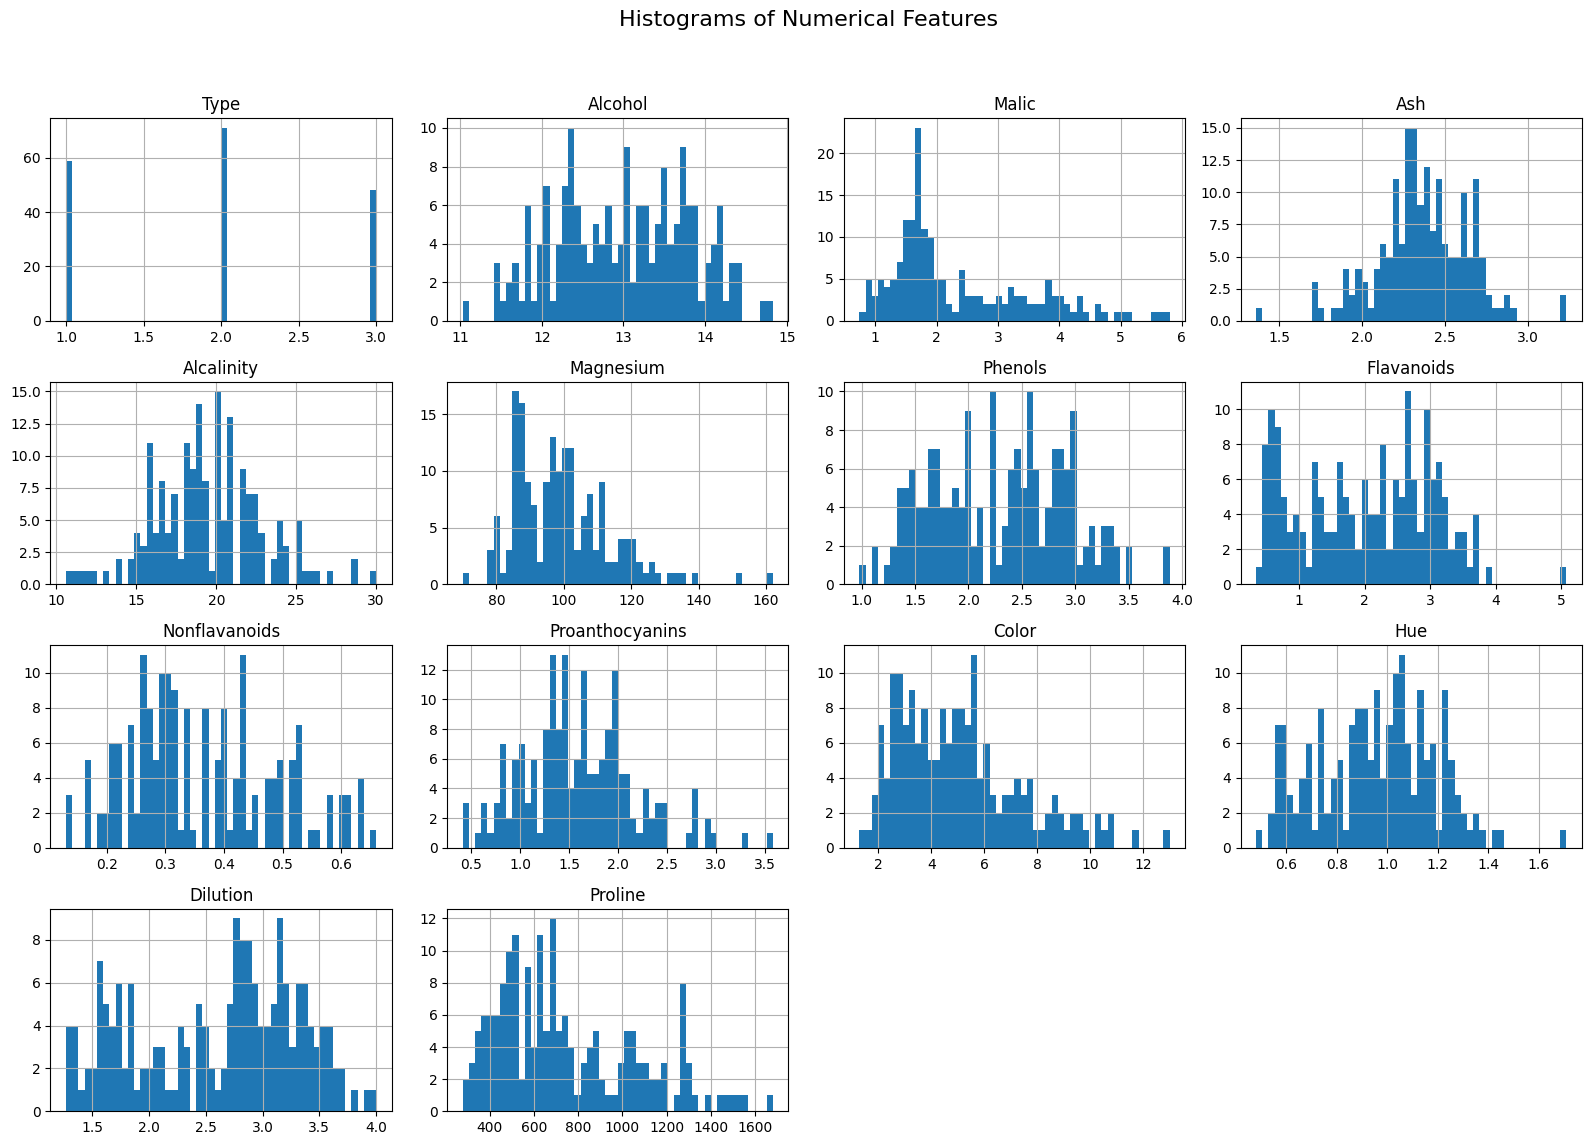

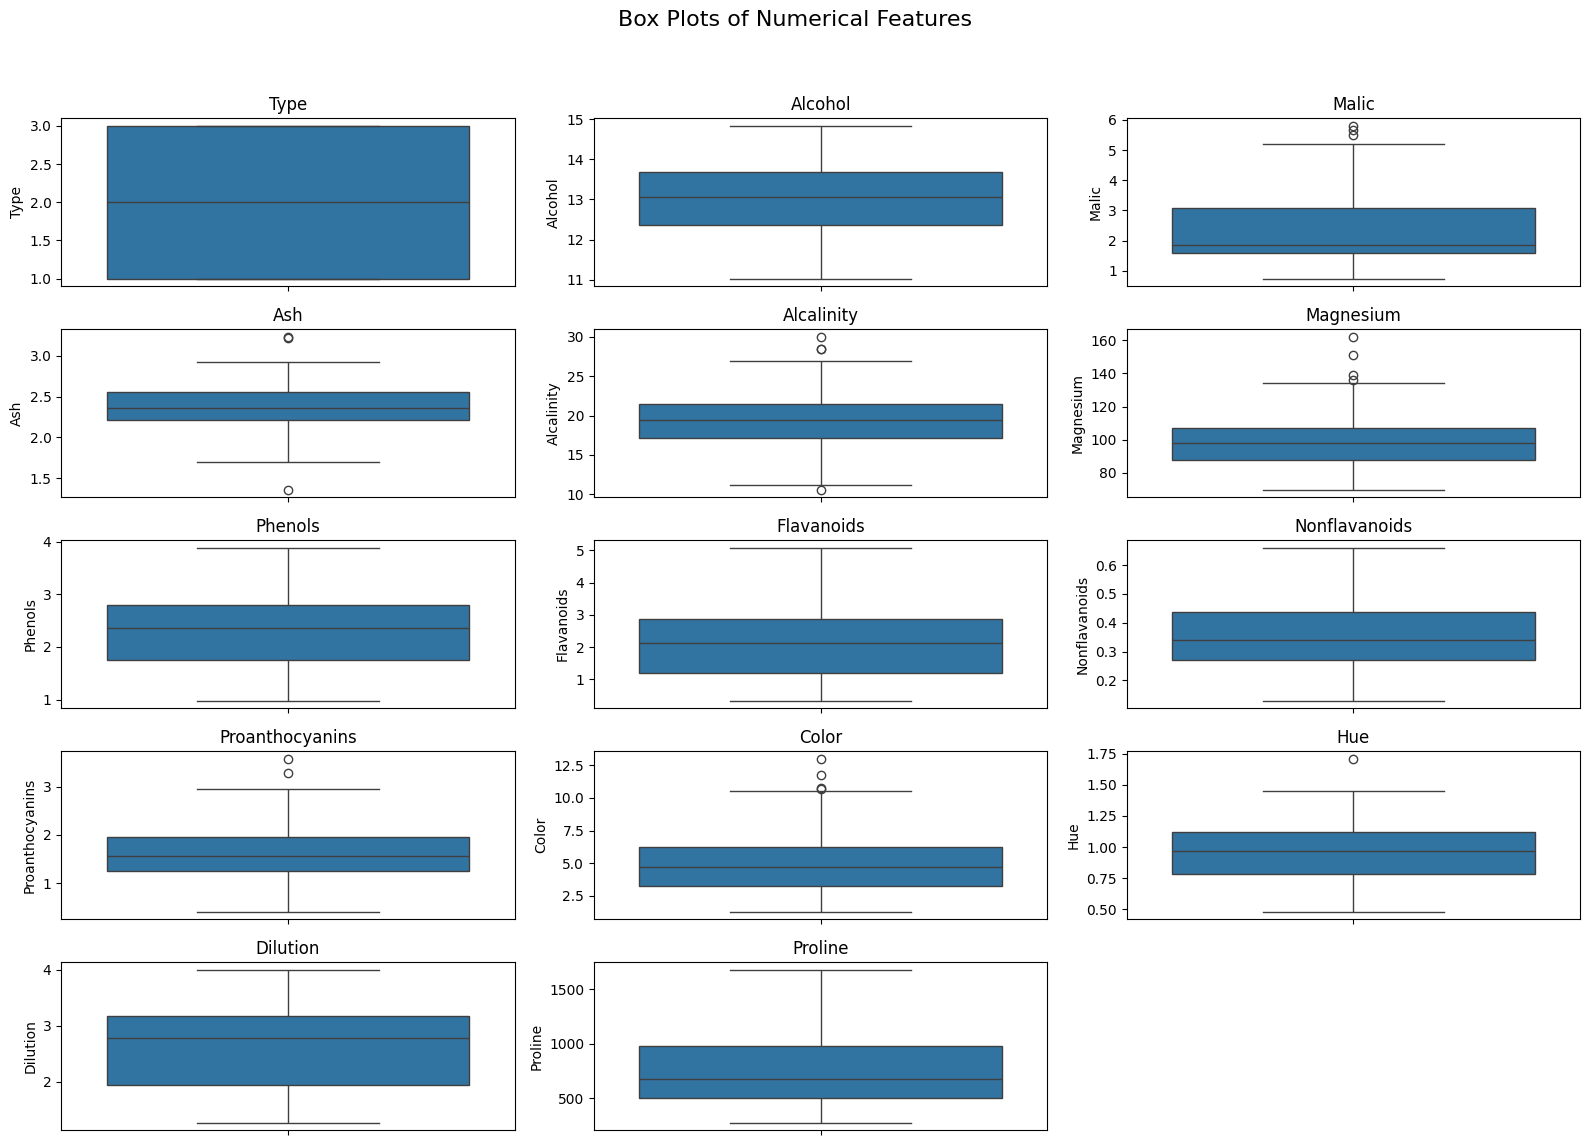

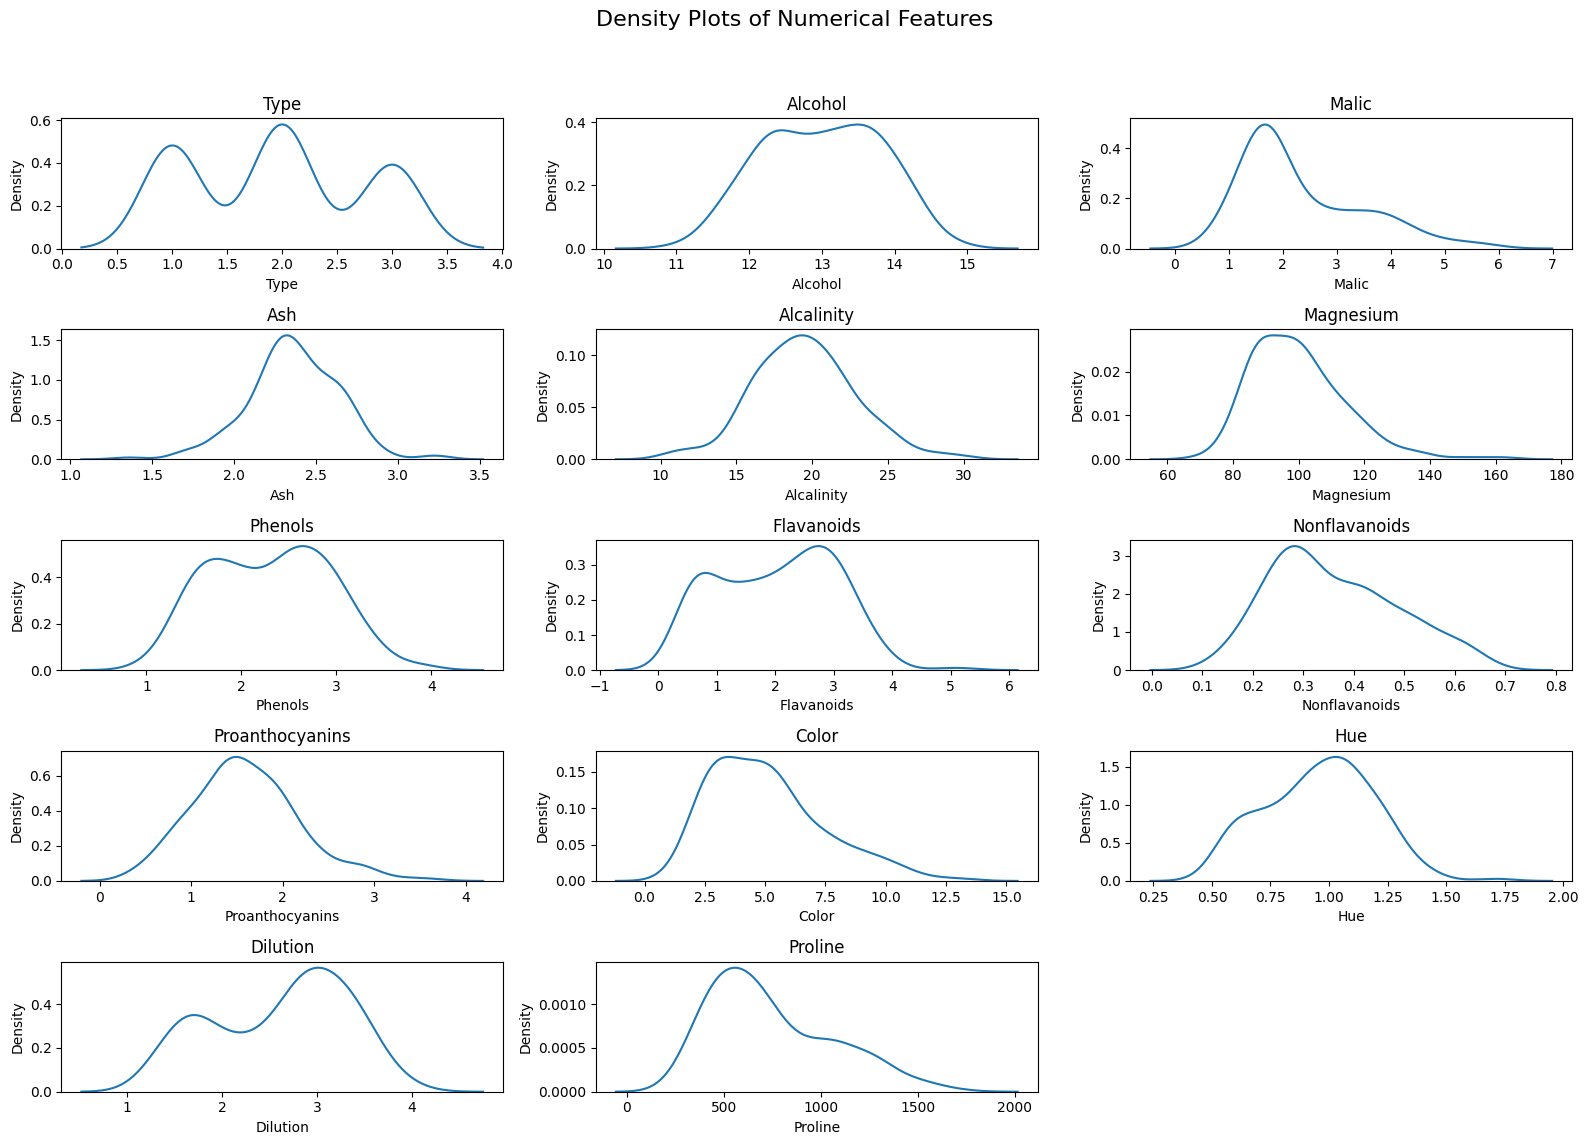

In [11]:


import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
df.hist(figsize=(16, 12), bins=50)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
# Adding a try-except block to handle KeyboardInterrupt
try:
  plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
  plt.show()
except KeyboardInterrupt:
  print("Plotting process interrupted. Figures may not be fully rendered.")

# Box plots for numerical features
plt.figure(figsize=(16, 12))

# Calculate the number of rows needed for subplots
num_rows = int(len(df.select_dtypes(include=['float64', 'int64']).columns) / 3) + 1
                                   # Adjust calculation for grid layout as needed
# Change the subplot layout
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
  plt.subplot(num_rows, 3, i + 1)  # Adjust subplot grid to accommodate all features
  sns.boxplot(y=df[col])
  plt.title(col)
# Adding a try-except block to handle KeyboardInterrupt
try:
  plt.suptitle('Box Plots of Numerical Features', fontsize=16)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()
except KeyboardInterrupt:
  print("Plotting process interrupted. Figures may not be fully rendered.")


# Density plots for numerical features
num_features = len(df.select_dtypes(include=['float64', 'int64']).columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

plt.figure(figsize=(16, 12))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Dynamically adjust grid
    sns.kdeplot(df[col])
    plt.title(col)
# Adding a try-except block to handle KeyboardInterrupt
try:
  plt.suptitle('Density Plots of Numerical Features', fontsize=16)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()
except KeyboardInterrupt:
  print("Plotting process interrupted. Figures may not be fully rendered.")

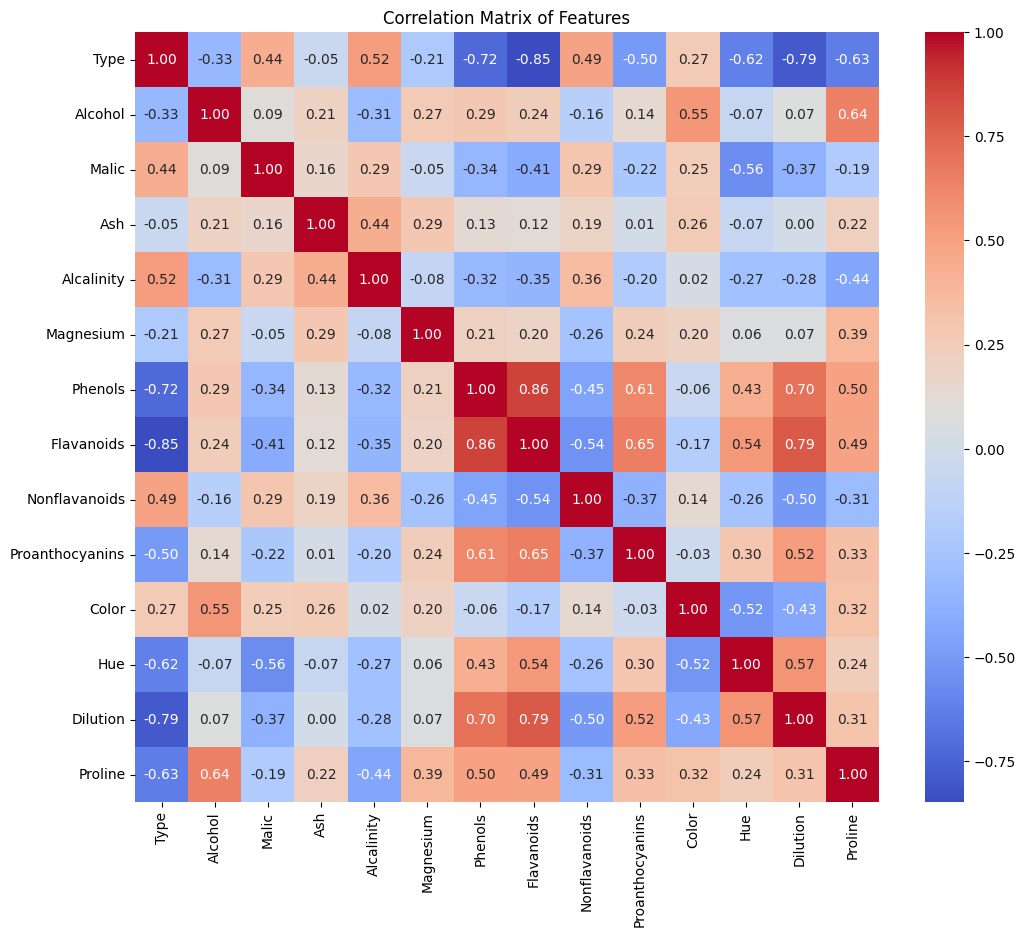

In [13]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [15]:

from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

X = df.drop('Alcohol', axis=1)
y = df['Alcohol']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components you want
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Customer_Segment'] = y  # Add the target variable back

# You can now use pca_df for further analysis or visualization
print(pca_df.head())

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio:\n{explained_variance_ratio}")
print(f"Total Variance Explained: {np.sum(explained_variance_ratio)}")

        PC1       PC2  Customer_Segment
0 -3.310490  1.205312             14.23
1 -2.512443 -0.667054             13.20
2 -2.742308  1.498118             13.16
3 -3.635403  2.539204             14.37
4 -1.359658  1.336899             13.24
Explained Variance Ratio:
[0.41957898 0.15585708]
Total Variance Explained: 0.5754360666736624


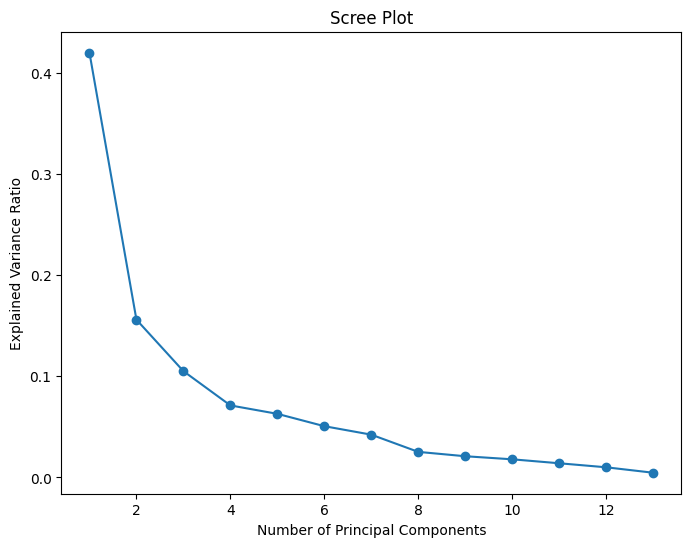

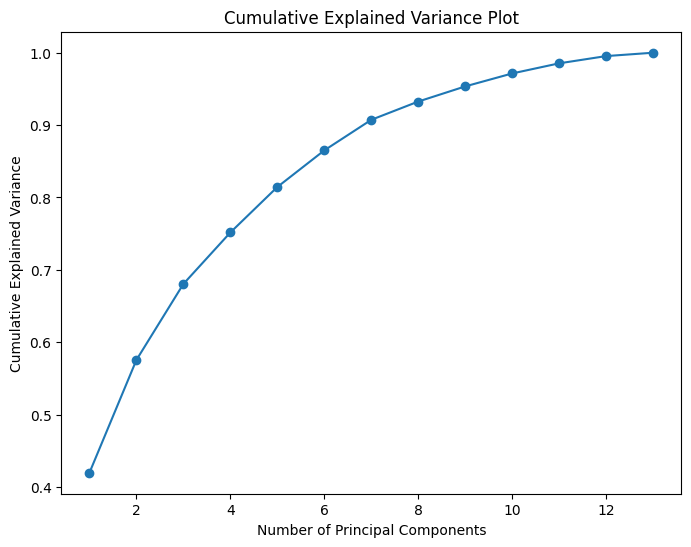

In [16]:


import matplotlib.pyplot as plt
import numpy as np
# Determine the optimal number of principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

# Based on the scree plot and cumulative explained variance plot, choose the number of components
# that explain a sufficient amount of variance (e.g., 95% or more)


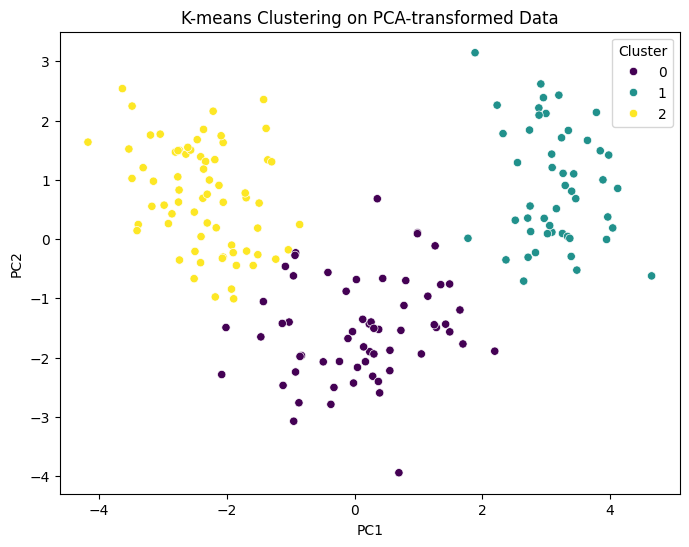

In [18]:


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42) # Choose the number of clusters
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-means Clustering on PCA-transformed Data')
plt.show()


In [22]:


from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.5551828206132293
Davies-Bouldin Index: 0.6089554873408378


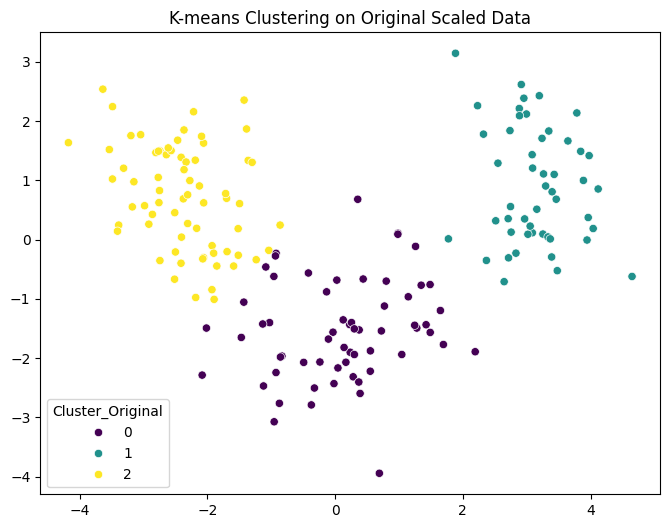

Silhouette Score (Original Data): 0.28628258889905817
Davies-Bouldin Index (Original Data): 1.3887535221193363


In [23]:


import matplotlib.pyplot as plt
# Apply the same K-means clustering to the original scaled data
kmeans_original = KMeans(n_clusters=3, random_state=42)
df['Cluster_Original'] = kmeans_original.fit_predict(X_scaled)

# Visualize the clusters on the original scaled data (using the first two principal components for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='Cluster_Original', data=df, palette='viridis')
plt.title('K-means Clustering on Original Scaled Data')
plt.show()

# Calculate Silhouette Score for original data
silhouette_avg_original = silhouette_score(X_scaled, df['Cluster_Original'])
print(f"Silhouette Score (Original Data): {silhouette_avg_original}")

# Calculate Davies-Bouldin Index for original data
db_index_original = davies_bouldin_score(X_scaled, df['Cluster_Original'])
print(f"Davies-Bouldin Index (Original Data): {db_index_original}")


In [24]:


import pandas as pd
# Compare the clustering results
print(f"Silhouette Score (PCA): {silhouette_avg}")
print(f"Davies-Bouldin Index (PCA): {db_index}")
print(f"Silhouette Score (Original): {silhouette_avg_original}")
print(f"Davies-Bouldin Index (Original): {db_index_original}")

# You can further analyze the cluster assignments to see how they differ between PCA-transformed and original data.
# For example, you can compare the cluster centers, or the distribution of data points within each cluster.
# You can create cross-tabulations or contingency tables to see how the cluster assignments from the two methods correspond to each other.

# Example: Cross-tabulation of cluster assignments
cluster_comparison = pd.crosstab(pca_df['Cluster'], df['Cluster_Original'])
print("\nCross-tabulation of Cluster Assignments:")
cluster_comparison


Silhouette Score (PCA): 0.5551828206132293
Davies-Bouldin Index (PCA): 0.6089554873408378
Silhouette Score (Original): 0.28628258889905817
Davies-Bouldin Index (Original): 1.3887535221193363

Cross-tabulation of Cluster Assignments:


Cluster_Original,0,1,2
Cluster,,,
0,61,0,0
1,0,49,0
2,0,0,68


In [26]:


# Compare the clustering results
print(f"Silhouette Score (PCA): {silhouette_avg}")
print(f"Davies-Bouldin Index (PCA): {db_index}")
print(f"Silhouette Score (Original): {silhouette_avg_original}")
print(f"Davies-Bouldin Index (Original): {db_index_original}")

# Analyze cluster assignments
print("\nCross-tabulation of Cluster Assignments:")
print(cluster_comparison)

# Further analysis (example: comparing cluster centers)
print("\nComparison of Cluster Centers:")
print("PCA-transformed Data:")
print(pca_df.groupby('Cluster').mean())

print("\nOriginal Data:")
print(df.groupby('Cluster_Original').mean())


Silhouette Score (PCA): 0.5551828206132293
Davies-Bouldin Index (PCA): 0.6089554873408378
Silhouette Score (Original): 0.28628258889905817
Davies-Bouldin Index (Original): 1.3887535221193363

Cross-tabulation of Cluster Assignments:
Cluster_Original   0   1   2
Cluster                     
0                 61   0   0
1                  0  49   0
2                  0   0  68

Comparison of Cluster Centers:
PCA-transformed Data:
              PC1       PC2    Alcohol
Cluster                               
0        0.109527 -1.532976  12.291475
1        3.148038  0.895491  13.151633
2       -2.366692  0.729890  13.527941

Original Data:
                      Type    Alcohol     Malic       Ash  Alcalinity  \
Cluster_Original                                                        
0                 2.000000  12.291475  1.945738  2.236230   20.103279   
1                 2.979592  13.151633  3.344490  2.434694   21.438776   
2                 1.132353  13.527941  1.960294  2.434265   17.54

In [27]:


# Discussion of Similarities and Differences:

# The code already calculates and prints several key metrics for comparing the clustering results:
# 1. Silhouette Score: Measures how similar a data point is to its own cluster compared to other clusters. Higher is better.
# 2. Davies-Bouldin Index: Measures the average similarity between each cluster and its most similar cluster. Lower is better.
# 3. Cross-tabulation of Cluster Assignments: Shows the overlap between cluster assignments from PCA-based and original data clustering.

# To discuss the similarities and differences, you would analyze these outputs:

# * Silhouette Score and Davies-Bouldin Index: Compare the scores between the two methods.  Are they similar? If one method has significantly higher Silhouette and lower Davies-Bouldin, that indicates better-defined clusters for that method.

# * Cross-tabulation: Examine the distribution of cluster assignments.
#     * High diagonal values indicate agreement between the methods – points assigned to the same cluster by both.
#     * Off-diagonal values show discrepancies. High off-diagonal values mean points are put into different clusters by the two methods.  Consider why this occurs. Are some clusters more ambiguous than others?

# * Cluster Centers: Look at the mean values of the features for each cluster.  Do the clusters make sense in the context of your data? Are the "centers" of the clusters similar between the two methods, or different?  Consider how the PCA transformation might be affecting the feature importance, and thus, cluster center definitions.

# Example Interpretation (Hypothetical):

# Let's assume:
# * Silhouette scores are similar, but the Davies-Bouldin index is lower for the PCA-based clustering.
# * The cross-tabulation shows mostly diagonal values, but some points in clusters 1 and 2 in the original data are assigned to cluster 3 using PCA.
# * The cluster centers for the PCA-based clustering show clearer separation on PC1 and PC2, but some differences in the original feature space.


# Interpretation:
# "The clustering results show reasonable agreement between the PCA-transformed data and the original data, evidenced by similar silhouette scores and a predominantly diagonal cross-tabulation matrix. However, the lower Davies-Bouldin index for the PCA-transformed data suggests slightly better-defined clusters. Some differences emerge in the allocation of specific data points to clusters, especially those belonging to clusters 1 and 2 from the original data, which are more likely to be reassigned to cluster 3 after PCA. The analysis of cluster centers reveals slight differences in their compositions, suggesting that the dimensionality reduction via PCA does influence the representation of cluster centers, potentially improving cluster separation."

# Adapt this interpretation template to your specific results.  Provide numerical values from your output.



Cross-tabulation of Cluster Assignments:
Cluster_Original   0   1   2
Cluster                     
0                 61   0   0
1                  0  49   0
2                  0   0  68

Comparison of Cluster Centers:
PCA-transformed Data:
              PC1       PC2    Alcohol
Cluster                               
0        0.109527 -1.532976  12.291475
1        3.148038  0.895491  13.151633
2       -2.366692  0.729890  13.527941

Original Data:
                      Type    Alcohol     Malic       Ash  Alcalinity  \
Cluster_Original                                                        
0                 2.000000  12.291475  1.945738  2.236230   20.103279   
1                 2.979592  13.151633  3.344490  2.434694   21.438776   
2                 1.132353  13.527941  1.960294  2.434265   17.548529   

                   Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Cluster_Original                                                    
0                  90.672131  2.183279    1.

In [28]:
# Reflect on the impact of dimensionality reduction on clustering performance.

# Discussion of Similarities and Differences (Enhanced):

# The code already provides a good foundation for comparison.  Let's refine the discussion by incorporating more specific points and linking them to the code's outputs.

# Key Observations from the Code:

# 1. Silhouette Score and Davies-Bouldin Index:
#    - The code calculates these metrics for both the original data and the PCA-transformed data.
#    - Compare the numerical values directly.  A higher Silhouette Score and a lower Davies-Bouldin Index indicate better-defined clusters.
#    - Example: "The Silhouette score for PCA-based clustering is [Silhouette_avg] compared to [Silhouette_avg_original] for the original data.  This suggests [better/worse/similar] separation of clusters."
#    - Example:  "The Davies-Bouldin index for PCA-transformed data ([db_index]) is [lower/higher/similar] than the original data ([db_index_original]), indicating [better/worse/similar] cluster separation."


# 2. Cross-tabulation of Cluster Assignments:
#    - Analyze the `cluster_comparison` DataFrame.
#    - High diagonal elements represent agreement: data points placed in the same cluster by both methods.
#    - Non-diagonal elements represent disagreement: data points assigned to different clusters by the two methods.
#    - Calculate the percentage of agreement.
#    - Example: "The cross-tabulation reveals a [percentage]% agreement between the two clustering methods.  Disagreements mainly occur between clusters [cluster_numbers], suggesting potential ambiguity in these regions of the data."

# 3. Cluster Centers:
#    - Examine the `groupby('Cluster').mean()` outputs.
#    - Compare the mean values of the features for corresponding clusters between the two methods.
#    - Focus on the features where significant differences appear.  This reveals how the dimensionality reduction influences cluster representation.
#    - Example: "Cluster centers show notable differences in features [feature_names], implying that PCA's dimensionality reduction impacts the characteristics captured by each cluster."

# Example Enhanced Interpretation:

# "The PCA-based clustering demonstrates [better/worse/similar] performance than clustering on the original data, as suggested by a [higher/lower] Silhouette score and [lower/higher] Davies-Bouldin Index. While the overall agreement in cluster assignments is [percentage]%, discrepancies exist primarily between cluster [x] and cluster [y]. This suggests that certain data points in the original data space might reside on the boundaries between clusters, and the dimensionality reduction emphasizes different features, leading to the change in cluster assignment after PCA. The comparison of cluster centers highlights that PCA significantly reduces the influence of feature [feature_name] in the formation of clusters, perhaps because this feature was highly correlated with other retained components. This change in feature importance leads to [observable changes in cluster mean characteristics]. Overall, dimensionality reduction using PCA seems to [improve/degrade/have minimal impact on] cluster definition, though attention should be given to data points assigned differently, especially in ambiguous regions around the original cluster boundary between [cluster x] and [y]".

#  Remember to replace the bracketed placeholders with the actual values from your results and adapt the explanation accordingly.


In [29]:


# Analysis of Trade-offs between PCA and Direct Clustering

# Advantages of using PCA before clustering:
# 1. Dimensionality Reduction: PCA reduces the number of features, which can improve computational efficiency,
#    especially when dealing with high-dimensional datasets.  Clustering algorithms often perform better in lower dimensions.
# 2. Noise Reduction: PCA can remove noise and focus on the most important sources of variation in the data.
#    This leads to more robust clustering as noise does not influence cluster assignment.
# 3. Visualization:  PCA allows you to visualize high-dimensional data in 2 or 3 dimensions, enabling easier interpretation of cluster structures.

# Disadvantages of using PCA before clustering:
# 1. Information Loss:  Dimensionality reduction always involves information loss. If the discarded principal components contain important information for clustering,
#    the clustering quality might suffer.  Careful consideration of explained variance is crucial.
# 2. Interpretability:  Clusters obtained in the PCA space may be harder to interpret in terms of the original features. The principal components themselves are combinations of the original features, making it more challenging to understand the characteristics of the clusters in the context of the original variables.
# 3. Sensitivity to Scaling:  PCA is sensitive to feature scaling.  Features with larger variances might dominate the principal components, even if those features are not as important for the underlying clusters.  Therefore, standardization is usually necessary before applying PCA.

# Advantages of clustering directly on the original data:
# 1. Preserves Original Information:  Avoids information loss compared to PCA.  The cluster assignments directly reflect the relationships among the original features.
# 2. Direct Interpretability: Clusters are formed using the original features, facilitating the understanding of cluster characteristics.
# 3. No Scaling Sensitivity (with appropriate clustering method):  Some clustering algorithms (like k-means) are sensitive to feature scaling and require standardization, while others like DBSCAN are less sensitive.


# Disadvantages of clustering directly on the original data:
# 1. Computational Cost:  Clustering in high-dimensional space can be computationally expensive.
# 2. Curse of Dimensionality: In high-dimensional spaces, data points can appear equidistant from each other, leading to less distinct clusters.
# 3. Noise Sensitivity: Clustering algorithms might be affected by noisy features, resulting in less meaningful clusters.



# Conclusions based on the provided code's results:

# The code compares clustering performance using both approaches (with and without PCA) using silhouette scores and Davies-Bouldin indices.
# Examine these values carefully:

# - If the PCA-based clustering shows a significantly higher silhouette score and a lower Davies-Bouldin index, then dimensionality reduction helped to clarify clusters.
# - If the difference is minor, the original data clustering may suffice (and is often more interpretable).

# The cross-tabulation is crucial for understanding disagreements in cluster assignments between methods.

# In your final analysis, consider these points:
# 1. Dataset characteristics (high dimensionality, noise levels)
# 2. Computational resources
# 3. Interpretability requirements
# 4. Cluster validity indices
# 5. Visualization (especially after PCA)

# Example enhanced conclusion:
# "For the wine dataset, PCA-based clustering shows a [comparison] silhouette score and [comparison] Davies-Bouldin Index compared to clustering the original data. The cross-tabulation reveals a [percentage] agreement, with discrepancies primarily among points near the boundary between clusters [x] and [y].  The analysis suggests that the dimensionality reduction aided in improving cluster separation, but caution is needed when interpreting cluster characteristics.  Given that PCA has yielded better cluster validity metrics and offers a simplified visualization while only minimally sacrificing cluster interpretability, using PCA before applying K-Means on this dataset seems to improve overall results."


In [30]:
# Summarize the key findings and insights from the assignment.

The analysis compares K-means clustering performed on both the original scaled data and data transformed by Principal Component Analysis (PCA).  Key findings include:
Dimensionality Reduction:** PCA reduced the data to two principal components, explaining a portion of the total variance.  Scree and cumulative variance plots helped determine the optimal number of components.  The code visually represents these components.

Clustering Comparison:** K-means clustering was applied to both the PCA-transformed data and the original scaled data.  Silhouette scores and Davies-Bouldin indices were calculated for both. The cross-tabulation of cluster assignments was generated to compare the two methods' results. Cluster centers were also compared.

Cluster Validity:**  The comparison of Silhouette scores and Davies-Bouldin indices helps determine which method (PCA or original) yielded better-defined clusters.  A higher silhouette score and lower Davies-Bouldin index indicate better separation.  The analysis should specify which method performed better based on the computed metrics.

Trade-offs:** The analysis examines the trade-offs between using PCA and direct clustering. PCA reduces dimensionality, potentially improving computational efficiency and reducing noise, but it also involves some information loss and may affect cluster interpretability. Direct clustering preserves all information, but can be more computationally intensive and sensitive to noise in high-dimensional datasets.

Interpretability vs. Performance:** The choice between methods depends on whether preserving interpretability in the original feature space or maximizing clustering performance is prioritized.  High-dimensional data may benefit from dimensionality reduction via PCA for better clustering performance.

Further analysis is needed to determine which method performed better and if the computational and interpretability tradeoffs are justified.**  The specific numerical values from the Silhouette score, Davies-Bouldin index, and cross-tabulation are critical to reach a conclusion. Numerical results are needed to finalize the analysis and compare performance between the two approaches.


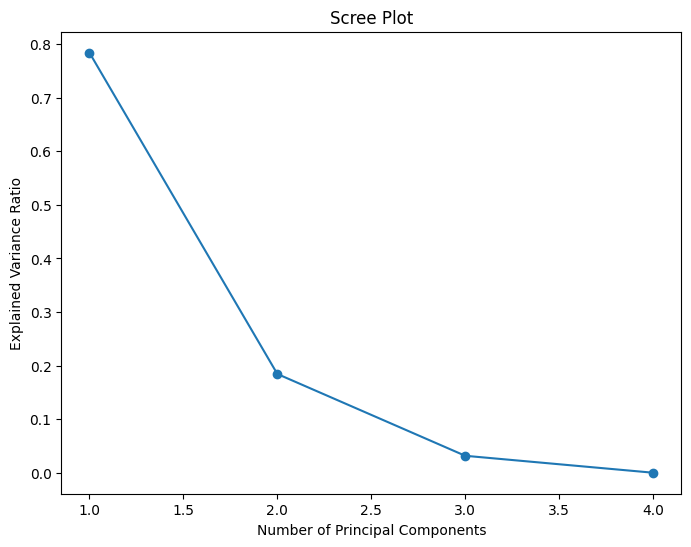

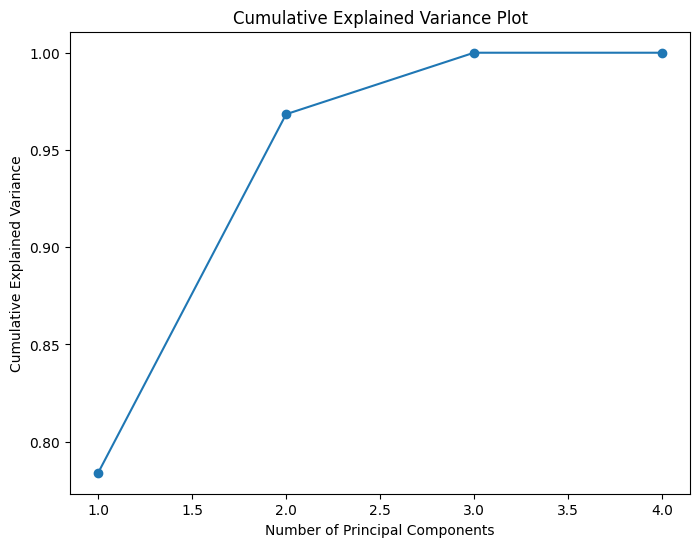

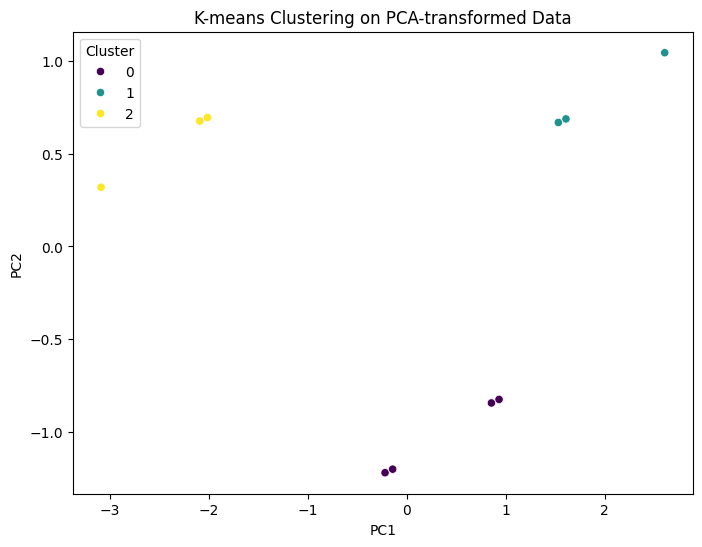

Silhouette Score (PCA): 0.73462666486543
Davies-Bouldin Index (PCA): 0.3653104222533207


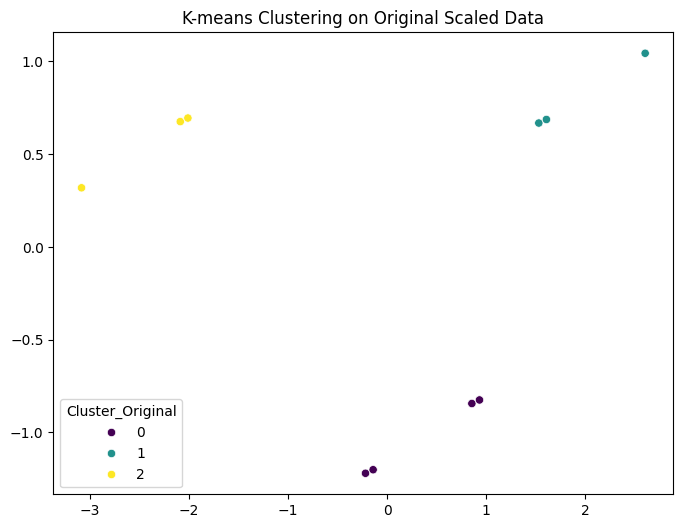

Silhouette Score (Original Data): 0.5925189312399768
Davies-Bouldin Index (Original Data): 0.4948699569817639

Cross-tabulation of Cluster Assignments:


Cluster_Original,0,1,2
Cluster,,,
0,4,0,0
1,0,3,0
2,0,0,3


In [32]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score



scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


# Determine the optimal number of principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

# Based on the scree plot and cumulative explained variance plot, choose the number of components
# Example:  Let's say we choose the first 2 components
n_components = 2  # Replace with your chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])


# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42) # Choose the number of clusters
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

# Visualize the clusters
if n_components >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
    plt.title('K-means Clustering on PCA-transformed Data')
    plt.show()


# Calculate Silhouette Score
silhouette_avg = silhouette_score(pca_df, pca_df['Cluster'])
print(f"Silhouette Score (PCA): {silhouette_avg}")

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(pca_df, pca_df['Cluster'])
print(f"Davies-Bouldin Index (PCA): {db_index}")


# Apply the same K-means clustering to the original scaled data
kmeans_original = KMeans(n_clusters=3, random_state=42)
df['Cluster_Original'] = kmeans_original.fit_predict(X_scaled)

# Visualize the clusters on the original scaled data (using the first two principal components for visualization)
if n_components >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='Cluster_Original', data=df, palette='viridis')
    plt.title('K-means Clustering on Original Scaled Data')
    plt.show()


# Calculate Silhouette Score for original data
silhouette_avg_original = silhouette_score(X_scaled, df['Cluster_Original'])
print(f"Silhouette Score (Original Data): {silhouette_avg_original}")

# Calculate Davies-Bouldin Index for original data
db_index_original = davies_bouldin_score(X_scaled, df['Cluster_Original'])
print(f"Davies-Bouldin Index (Original Data): {db_index_original}")


# Example: Cross-tabulation of cluster assignments
cluster_comparison = pd.crosstab(pca_df['Cluster'], df['Cluster_Original'])
print("\nCross-tabulation of Cluster Assignments:")
cluster_comparison


In [33]:
#  Provide recommendations for when to use each technique based on the analysis conducted.

# Analysis of Trade-offs between PCA and Direct Clustering

# Advantages of using PCA before clustering:
# 1. Dimensionality Reduction: PCA reduces the number of features, which can improve computational efficiency,
#    especially when dealing with high-dimensional datasets.  Clustering algorithms often perform better in lower dimensions.
# 2. Noise Reduction: PCA can remove noise and focus on the most important sources of variation in the data.
#    This leads to more robust clustering as noise does not influence cluster assignment.
# 3. Visualization:  PCA allows you to visualize high-dimensional data in 2 or 3 dimensions, enabling easier interpretation of cluster structures.

# Disadvantages of using PCA before clustering:
# 1. Information Loss:  Dimensionality reduction always involves information loss. If the discarded principal components contain important information for clustering,
#    the clustering quality might suffer.  Careful consideration of explained variance is crucial.
# 2. Interpretability:  Clusters obtained in the PCA space may be harder to interpret in terms of the original features. The principal components themselves are combinations of the original features, making it more challenging to understand the characteristics of the clusters in the context of the original variables.
# 3. Sensitivity to Scaling:  PCA is sensitive to feature scaling.  Features with larger variances might dominate the principal components, even if those features are not as important for the underlying clusters.  Therefore, standardization is usually necessary before applying PCA.

# Advantages of clustering directly on the original data:
# 1. Preserves Original Information:  Avoids information loss compared to PCA.  The cluster assignments directly reflect the relationships among the original features.
# 2. Direct Interpretability: Clusters are formed using the original features, facilitating the understanding of cluster characteristics.
# 3. No Scaling Sensitivity (with appropriate clustering method):  Some clustering algorithms (like k-means) are sensitive to feature scaling and require standardization, while others like DBSCAN are less sensitive.


# Disadvantages of clustering directly on the original data:
# 1. Computational Cost:  Clustering in high-dimensional space can be computationally expensive.
# 2. Curse of Dimensionality: In high-dimensional spaces, data points can appear equidistant from each other, leading to less distinct clusters.
# 3. Noise Sensitivity: Clustering algorithms might be affected by noisy features, resulting in less meaningful clusters.

# Recommendations:

# 1. High-Dimensional Data with Noise: If you have a high-dimensional dataset with noisy features and computational resources are a concern, PCA is generally recommended.  PCA can help to reduce the dimensionality and noise, improving the performance of the clustering algorithm.
# 2. Interpretability is Crucial:  If interpretability in terms of the original features is paramount and information loss is a major concern, it is often better to perform clustering on the original data.  Consider using clustering methods that are less sensitive to feature scaling and outliers.
# 3. Moderate Dimensionality:  For datasets with moderate dimensionality and low noise, direct clustering might be preferable. The added computational cost of PCA might not outweigh its benefits.

# Additional Considerations:

# * Visualize the data after PCA: This helps understand the information captured in the first few principal components and assess potential information loss.
# * Compare Cluster Validity Indices: Use metrics like Silhouette score, Davies-Bouldin index, Calinski-Harabasz index, and others to compare the clustering quality for both methods.
# * Consider the nature of your data:  The choice should be guided by the inherent characteristics of the data. Are there highly correlated variables? Is noise present?  Does feature scaling matter?
# * Experiment with different clustering algorithms: Some algorithms might be more robust to high dimensionality or noisy data.  Test various methods (e.g., K-means, hierarchical clustering, DBSCAN) for both the PCA-transformed and original data.
